# Energy Star Score Prediction

<img src = "https://th.bing.com/th/id/R.2a7d353efa3055dba5b68654be84c40d?rik=NQfGxPSq%2fE8bog&riu=http%3a%2f%2fsigearth.com%2fwp-content%2fuploads%2f2021%2f06%2fbuildings_with_ENERGY_STAR_logo.jpg&ehk=LLxbfFOvLYxIFZjIIHcg0Gop1EugH8r0z74udnTCH5Y%3d&risl=&pid=ImgRaw&r=0" />

# Problem Statement

Local Law 84 of 2009, or the NYC Benchmarking Law, requires annual benchmarking and disclosure of energy and water 
usage information. Covered properties include tax lots with a single building with a gross floor area greater than 50,000 
square feet (sq ft) and tax lots having more than one building with a gross floor area of more than 100,000 sq ft. Starting 
in 2018, the NYC Benchmarking Law will also include properties greater than 25,000 sq ft.
This data set includes information reported to the City by August 1, 2016 for calendar year 2015 energy and water 
consumption data and data from the 2016 Covered Buildings List. Metrics are calculated by the Environmental 
Protection Agency’s tool ENERGY STAR Portfolio Manager, and data is self-reporting by building owners. The public 
availability of data allows for local and national comparison of a buildings’ performance, incentivizes the most accurate 
benchmarking of energy usage, and informs energy management decisions.

# Importing libraries

In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split


In [32]:
pd.set_option('display.max_columns',None)
data = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
data.head()
data.reset_index(drop =True)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [34]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


# Preprocessing



In [117]:
data.replace("Not Available" , np.nan , inplace = True)

In [36]:
data.isnull().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

In [37]:
data[data["ENERGY STAR Score"].isnull()]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,NaN,NaN,NaN,NaN,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,NaN,NaN,NaN,5.15506751E7,NaN,NaN,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,NaN,NaN,NaN,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,231342,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,NaN,NaN,NaN,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1305748,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,NaN,NaN,NaN,NaN,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,179694,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,10021,512,EAST 71 STREET,Manhattan,245000.0,Mixed Use Property,Other,Other,245000,NaN,NaN,NaN,NaN,1932,1,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,245000,NaN,NaN

In [38]:
test = data[data["ENERGY STAR Score"].isnull()]
test

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,NaN,NaN,NaN,NaN,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,NaN,NaN,NaN,5.15506751E7,NaN,NaN,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,NaN,NaN,NaN,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,231342,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,NaN,NaN,NaN,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1305748,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,NaN,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694,NaN,NaN,NaN,NaN,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,179694,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,10021,512,EAST 71 STREET,Manhattan,245000.0,Mixed Use Property,Other,Other,245000,NaN,NaN,NaN,NaN,1932,1,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,245000,NaN,NaN

In [39]:
test.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                  9
NYC Borough, Block and Lot (BBL) self-reported                   9
NYC Building Identification Number (BIN)                        30
Address 1 (self-reported)                                        0
Address 2                                                     2050
Postal Code                                                      0
Street Number                                                   56
Street Name                                                     56
Borough                                                         55
DOF Gross Floor Area                                          

In [40]:
df = data[~data["ENERGY STAR Score"].isnull()]


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       9642 non-null   int64  
 1   Property Id                                                 9642 non-null   int64  
 2   Property Name                                               9642 non-null   object 
 3   Parent Property Id                                          9642 non-null   object 
 4   Parent Property Name                                        9642 non-null   object 
 5   BBL - 10 digits                                             9640 non-null   object 
 6   NYC Borough, Block and Lot (BBL) self-reported              9640 non-null   object 
 7   NYC Building Identification Number (BIN)                    9510 non-null   object 
 8   Ad

In [42]:
data.isnull().sum()/len(df)*100

Order                                                           0.000000
Property Id                                                     0.000000
Property Name                                                   0.000000
Parent Property Id                                              0.000000
Parent Property Name                                            0.000000
BBL - 10 digits                                                 0.114084
NYC Borough, Block and Lot (BBL) self-reported                  0.114084
NYC Building Identification Number (BIN)                        1.680149
Address 1 (self-reported)                                       0.000000
Address 2                                                     119.674341
Postal Code                                                     0.000000
Street Number                                                   1.286040
Street Name                                                     1.265298
Borough                                            

In [43]:
df.isnull().sum()/len(df)*100

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.020743
NYC Borough, Block and Lot (BBL) self-reported                 0.020743
NYC Building Identification Number (BIN)                       1.369011
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.413192
Postal Code                                                    0.000000
Street Number                                                  0.705248
Street Name                                                    0.684505
Borough                                                        0

In [44]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,NaN,NaN,NaN,NaN,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,NaN,1.96248472E7,NaN,NaN,NaN,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,525 East 68th Street,NaN,10021,1176,YORK AVENUE,Manhattan,2230742.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874,NaN,NaN,NaN,NaN,1932,12,100,Whole Building,Whole Building,55,359.9,359,8.3,4.8,411.5,NaN,2.00832154E7,NaN,NaN,NaN,-4.690796909E8,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,77564.1,-23134.3,2971874,NaN,NaN,414.2,04/27/2017 11:23:27 AM,No,In Compliance,40.761395,-73.957726,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,aka 10 Clinton St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503,Other,20000,Parking,18800,1903,2,100,Whole Building,Whole Building,93,32,NaN,7.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2047200,20472,11241926.1,3249755.2,1194,150.8,1043.2,432503,22061,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656,Parking,40000,Retail Store,10000,1903,1,100,Whole Building,NaN,1,295.4,316.8,5.8,3,374.2,NaN,NaN,NaN,NaN,NaN,NaN,4.75229012E7,512710.7,3477064.5,1004824,2846.8,2524.2,322.7,172656,NaN,NaN,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,40.695835,-73.991673,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,17,2777235

In [45]:
null_columns = []

for column in df:
    if df[column].isnull().sum() > float(25):
        null_columns.append(column)

null_columns

['NYC Building Identification Number (BIN)',
 'Address 2',
 'Street Number',
 'Street Name',
 'Borough',
 'DOF Gross Floor Area',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Metered Areas  (Water)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Weather Normalized Site Electricity (kWh)',
 'Water Use (All Water Sources) (kgal)',
 'Water Intensity (All Water Sources) (gal/ft²)',
 'Water Required?',
 'DO

In [46]:
df.drop(null_columns ,axis = 1 ,  inplace = True)

In [47]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'Address 1 (self-reported)', 'Postal Code',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)',
       'Release Date'],
      dtype='object')

In [48]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",Address 1 (self-reported),Postal Code,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,622 168th Street,10032,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,1969,12,100,Whole Building,55,229.8,55870.4,51016.4,4854.1,3889181,404.3,04/27/2017 11:23:27 AM
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,525 East 68th Street,10021,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),2971874,1932,12,100,Whole Building,55,359.9,54429.8,77564.1,-23134.3,2971874,414.2,04/27/2017 11:23:27 AM
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,101 Clark St,11201,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503,1903,2,100,Whole Building,93,32,1194,150.8,1043.2,432503,87.9,04/28/2017 04:07:55 PM
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,101 Clark St,11201,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656,1903,1,100,Whole Building,1,295.4,2846.8,2524.2,322.7,172656,352.2,04/28/2017 04:07:55 PM
14,17,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5033550032;5-03355-0065,475 SEAVIEW AVE,10305,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),567517,1950,2,100,Whole Building,80,352.7,13302.6,7509.5,5793.1,567517,599.5,04/25/2017 12:11:30 PM


In [49]:
unimportant_columns = ['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'Address 1 (self-reported)', 'Postal Code',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property','Release Date','Metered Areas (Energy)','Number of Buildings - Self-reported',
                      "Occupancy"]

df.drop(unimportant_columns , inplace = True , axis = 1)

In [50]:
df.head()

,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²)
1,Hospital (General Medical & Surgical),3889181,1969,55,229.8,55870.4,51016.4,4854.1,3889181,404.3
5,Hospital (General Medical & Surgical),2971874,1932,55,359.9,54429.8,77564.1,-23134.3,2971874,414.2
12,Multifamily Housing,412503,1903,93,32,1194,150.8,1043.2,432503,87.9
13,Multifamily Housing,162656,1903,1,295.4,2846.8,2524.2,322.7,172656,352.2
14,Hospital (General Medical & Surgical),567517,1950,80,352.7,13302.6,7509.5,5793.1,567517,599.5


## Feature Selection

In [51]:
df.iloc[:,1:].corr() 


,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²)
Largest Property Use Type - Gross Floor Area (ft²),1.000000,0.103934,0.017734,-0.001382,0.066146,0.021536,0.063292,0.995988,-0.000936
Year Built,0.103934,1.000000,-0.118181,0.021442,0.024744,0.020610,0.017260,0.105333,0.021656
ENERGY STAR Score,0.017734,-0.118181,1.000000,-0.036123,-0.047934,-0.026355,-0.040326,0.016800,-0.042873
Site EUI (kBtu/ft²),-0.001382,0.021442,-0.036123,1.000000,0.538541,0.978351,0.101293,-0.001523,0.996348
Total GHG Emissions (Metric Tons CO2e),0.066146,0.024744,-0.047934,0.538541,1.000000,0.457959,0.888737,0.065629,0.547877
Direct GHG Emissions (Metric Tons CO2e),0.021536,0.020610,-0.026355,0.978351,0.457959,1.000000,-0.000517,0.020866,0.965795
Indirect GHG Emissions (Metric Tons CO2e),0.063292,0.017260,-0.040326,0.101293,0.888737,-0.000517,1.000000,0.063056,0.118270
Property GFA - Self-Reported (ft²),0.995988,0.105333,0.016800,-0.001523,0.065629,0.020866,0.063056,1.000000,-0.001012
Source EUI (kBtu/ft²),-0.000936,0.021656,-0.042873,0.996348,0.547877,0.965795,0.118270,-0.001012,1.000000


In [52]:
df.isnull().sum()

Largest Property Use Type                              0
Largest Property Use Type - Gross Floor Area (ft²)     0
Year Built                                             0
ENERGY STAR Score                                      0
Site EUI (kBtu/ft²)                                    0
Total GHG Emissions (Metric Tons CO2e)                 3
Direct GHG Emissions (Metric Tons CO2e)               13
Indirect GHG Emissions (Metric Tons CO2e)              9
Property GFA - Self-Reported (ft²)                     0
Source EUI (kBtu/ft²)                                  0
dtype: int64

In [53]:
for i in df.iloc[:,1:]:
    print(i)
    df[i] = pd.to_numeric(df[i])
    print(df[i].unique())

Largest Property Use Type - Gross Floor Area (ft²)
[3889181. 2971874.  412503. ...   74177.  103328.   60715.]
Year Built
[1969 1932 1903 1950 1939 1911 1973 1952 1996 1898 1908 1924 1935 1925
 1961 1910 1980 1988 1909 1920 2004 1914 1928 1976 1929 1970 2003 1966
 1981 1959 1960 1986 1894 1962 1893 1964 1967 1915 2007 1965 1987 1978
 1990 1953 1955 1968 1954 1951 1994 1947 2005 1900 1888 1887 1957 1975
 1984 1963 1949 1921 1972 1930 1940 1985 1931 1882 1958 1902 2006 1999
 2000 2001 2008 2009 1983 2013 1916 1917 1904 1927 1956 1913 1982 1997
 1926 1836 1907 1827 1989 1922 1912 1905 2010 1600 1971 1936 1906 1992
 1918 1883 2012 1896 1901 1890 1845 1991 1995 1865 1933 1979 2002 1938
 2016 1885 1897 1919 1974 1873 1941 1895 1891 1923 1899 1850 2011 2014
 1934 1942 1937 1945 1875 1886 1880 1867 1870 1877 1892 1993 1948 1998
 1977 2015 1889 1946 1943 1853 1944 1881 1649 2019]
ENERGY STAR Score
[ 55  93   1  80  72  67 100  40  99  12  88  89  86  73  71  74  19  84
  78  81   6  77   3  59 

In [54]:
def nafill(df):
    for i in df.columns:
        if df.dtypes[i] == np.number:
            df[i].fillna(df[i].median(), inplace = True)
        
            
    return df
df = nafill(df)

In [55]:
df.isnull().sum()

Largest Property Use Type                             0
Largest Property Use Type - Gross Floor Area (ft²)    0
Year Built                                            0
ENERGY STAR Score                                     0
Site EUI (kBtu/ft²)                                   0
Total GHG Emissions (Metric Tons CO2e)                0
Direct GHG Emissions (Metric Tons CO2e)               0
Indirect GHG Emissions (Metric Tons CO2e)             0
Property GFA - Self-Reported (ft²)                    0
Source EUI (kBtu/ft²)                                 0
dtype: int64

In [56]:
df["Largest Property Use Type"].unique()

array(['Hospital (General Medical & Surgical)', 'Multifamily Housing',
       'Office', 'Residence Hall/Dormitory', 'Medical Office',
       'Senior Care Community', 'Bank Branch', 'K-12 School',
       'Retail Store', 'Hotel', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Worship Facility',
       'Distribution Center', 'Parking', 'Supermarket/Grocery Store',
       'Courthouse', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# le = LabelEncoder()
# df["Largest Property Use Type"] = le.fit_transform(df["Largest Property Use Type"])


In [59]:
df=pd.get_dummies(df,columns=["Largest Property Use Type"],drop_first=True,dtype=int)

In [60]:
df

,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Medical Office,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Parking,Largest Property Use Type_Refrigerated Warehouse,Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Retail Store,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
1,3889181.0,1969,55,229.8,55870.4,51016.4,4854.1,3889181,404.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2971874.0,1932,55,359.9,54429.8,77564.1,-23134.3,2971874,414.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,412503.0,1903,93,32.0,1194.0,150.8,1043.2,432503,87.9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13,162656.0,1903,1,295.4,2846.8,2524.2,322.7,172656,352.2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
14,567517.0,1950,80,352.7,13302.6,7509.5,5793.1,567517,599.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,74177.0,1928,98,81.4,354.7,275.1,79.6,74177,109.6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11742,93500.0,1926,16,109.3,674.6,499.7,175.0,101291,153.4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11743,103328.0,1913,83,44.3,355.2,93.6,261.6,103328,103.6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11744,60715.0,1928,92,70.0,247.8,196.2,51.7,60715,92.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
df[df.duplicated()]

,Largest Property Use Type - Gross Floor Area (ft²),Year Built,ENERGY STAR Score,Site EUI (kBtu/ft²),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Medical Office,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Parking,Largest Property Use Type_Refrigerated Warehouse,Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Retail Store,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
751,136070.0,1963,26,94.7,926.4,0.0,926.4,136070,152.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7163,311551.0,1969,100,26.8,486.4,451.5,34.9,311551,30.6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11031,150000.0,1954,100,1.8,25.6,0.0,25.6,150000,5.8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11087,151869.0,1940,11,117.2,1033.6,826.6,207.0,151869,153.7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11092,115654.0,1940,58,109.8,731.0,598.2,132.8,115654,141.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [69]:
df.columns , len(df.columns) 

(Index(['Year Built', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
        'Total GHG Emissions (Metric Tons CO2e)',
        'Direct GHG Emissions (Metric Tons CO2e)',
        'Indirect GHG Emissions (Metric Tons CO2e)',
        'Property GFA - Self-Reported (ft²)', 'Source EUI (kBtu/ft²)',
        'Largest Property Use Type_Courthouse',
        'Largest Property Use Type_Distribution Center',
        'Largest Property Use Type_Financial Office',
        'Largest Property Use Type_Hospital (General Medical & Surgical)',
        'Largest Property Use Type_Hotel',
        'Largest Property Use Type_K-12 School',
        'Largest Property Use Type_Medical Office',
        'Largest Property Use Type_Multifamily Housing',
        'Largest Property Use Type_Non-Refrigerated Warehouse',
        'Largest Property Use Type_Office', 'Largest Property Use Type_Parking',
        'Largest Property Use Type_Refrigerated Warehouse',
        'Largest Property Use Type_Residence Hall/Dormitory',
       

In [63]:
df.drop(["Largest Property Use Type - Gross Floor Area (ft²)"] , inplace=True , axis=1)

In [64]:
x = df.drop(["ENERGY STAR Score" ] , axis = 1)
y = df["ENERGY STAR Score"]

In [65]:


x_train , y_train , x_test ,y_test = train_test_split( x , y , train_size=0.8 , random_state= 54 )

In [66]:
x_train.shape,x_test.shape

((7713, 25), (7713,))

In [67]:
y_train.shape,y_test.shape

((1929, 25), (1929,))

In [70]:
from sklearn.feature_selection import RFE

from sklearn.svm import SVR

estimator = LinearRegression()

selector = RFE(estimator, n_features_to_select=13, step=1)

selector.fit(x_train, x_test)

print(selector.support_)

print(selector.ranking_)

[False False False False False False False  True False  True  True False
  True False  True  True  True  True  True  True  True False  True False
  True]
[ 7 12  8 10  9 13 11  1  2  1  1  5  1  3  1  1  1  1  1  1  1  6  1  4
  1]


In [72]:
rank = pd.DataFrame({"Feature Names" : x_train.columns , "Feature Ranking" : selector.ranking_})
rank[rank["Feature Ranking"] == 1]

,Feature Names,Feature Ranking
7,Largest Property Use Type_Courthouse,1
9,Largest Property Use Type_Financial Office,1
10,Largest Property Use Type_Hospital (General Me...,1
12,Largest Property Use Type_K-12 School,1
14,Largest Property Use Type_Multifamily Housing,1
15,Largest Property Use Type_Non-Refrigerated War...,1
16,Largest Property Use Type_Office,1
17,Largest Property Use Type_Parking,1
18,Largest Property Use Type_Refrigerated Warehouse,1
19,Largest Property Use Type_Residence Hall/Dormi...,1


## Model Training

# LinearRegression


In [73]:

lr = LinearRegression()
lr.fit(x_train , x_test)

lr_predict = lr.predict(x_train)

r2_score(x_test,lr_predict)

0.06968669098992553

# RandomForestRegressor

In [74]:

rf = RandomForestRegressor()
rf.fit(x_train,x_test)


RandomForestRegressor()

# Validating the model on train and test set

In [75]:

rf_predict = rf.predict(x_train)
r2_score(rf_predict,x_test)

0.969502396642916

In [76]:
rf_test_predict = rf.predict(y_train)
r2_score(y_test,rf_test_predict)

0.8062494318794808

In [77]:
mean_squared_error(x_test ,rf_predict)

24.380806532877394

In [78]:
np.mean(y_test==rf_test_predict) , np.mean(x_test==rf_predict) 

(0.02851218247796786, 0.040969791261506544)

# SVR

In [79]:
from sklearn.svm import SVR

svr =SVR()
svr.fit(x_train,x_test)

SVR()

In [109]:
svr_test = svr.predict(y_train)
svr_predict = svr.predict(x_train)
r2_score(x_test,svr_predict) , r2_score(svr_test , y_test)

(-0.027464535166086712, -437.6979311345912)

# DecisionTreeRegressor

In [85]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train , x_test)

DecisionTreeRegressor()

# Validating the model on train and test set

In [86]:
dt_predict_train = dt.predict(x_train)
dt_predict_test = dt.predict(y_train)

In [87]:
r2_score(x_test,dt_predict_train) ,r2_score(y_test,dt_predict_test)



(0.9999739339873327, 0.6392529501524418)

In [88]:
x_train.shape,x_test.shape

((7713, 25), (7713,))

In [89]:
y_train.shape,y_test.shape

((1929, 25), (1929,))

# GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor()
gd.fit(x_train , x_test)

GradientBoostingRegressor()

In [91]:
train_gd = gd.predict(x_train)
test_gd = gd.predict(y_train)

In [92]:
r2_score(x_test , train_gd) , r2_score(y_test , test_gd)

(0.8362259047092548, 0.820100614381849)

In [93]:
mean_squared_error(x_test , train_gd)

147.03627164786738

In [94]:
y_test.shape , test_gd.shape

((1929,), (1929,))

In [95]:
x_test.shape , train_gd.shape

((7713,), (7713,))

In [96]:
mean_squared_error(y_test , test_gd)

163.04158420267083

In [97]:
gd_5= GradientBoostingRegressor(criterion="squared_error" )
gd_5.fit(x_train , x_test)

GradientBoostingRegressor(criterion='squared_error')

In [98]:
train_gd_5 = gd_5.predict(x_train)
test_gd_5 = gd_5.predict(y_train)

In [99]:
r2_score(x_test , train_gd_5) , r2_score(y_test , test_gd_5)

(0.8362259047092548, 0.8199412710594686)

In [100]:
mean_squared_error(x_test , train_gd_5)

147.0362716478674

In [101]:
mean_squared_error(y_test , test_gd_5)

163.18599596719002

In [102]:
mean_absolute_error(y_test , test_gd_5)  , mean_absolute_error(x_test , train_gd_5) 

(9.211723423471412, 8.690951659160714)

In [103]:
np.mean(x_test == train_gd_5)

0.0

<Axes: xlabel='ENERGY STAR Score', ylabel='Count'>

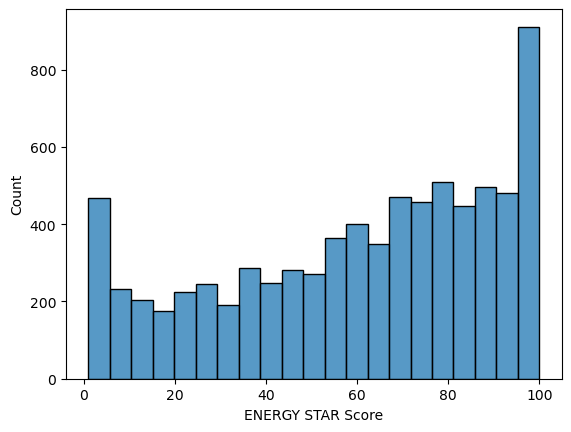

In [104]:
sns.histplot(x_test)

<Axes: ylabel='Count'>

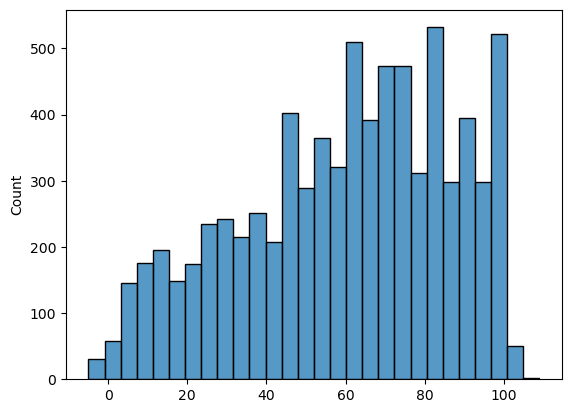

In [105]:
sns.histplot(np.round(train_gd_5))

In [107]:
model = ["LinearRegression" ,"RandomForestRegressor" , "SVR" , "DecisionTreeRegressor" , "GradientBoostingRegressor" ,
        "GradientBoostingRegressor_criterion_squared_error"]

In [110]:
train_Accuracy  = [r2_score(rf_predict,x_test) , r2_score(rf_predict,x_test) ,r2_score(x_test,svr_predict) ,r2_score(x_test,dt_predict_train) ,
                  r2_score(x_test , train_gd) , r2_score(x_test , train_gd_5)
                   
 ]

In [111]:
test_Accuracy  = [r2_score(y_test,rf_test_predict) , r2_score(y_test,rf_test_predict) ,r2_score(y_test,svr_test) , r2_score(y_test,dt_predict_test) , 
                 r2_score(y_test , test_gd) , r2_score(y_test , test_gd_5)
                 ]

In [112]:
accuracy = pd.DataFrame({"Model":model , "train_Accuracy" : train_Accuracy , "test_Accuracy" : test_Accuracy })

In [113]:
accuracy

,Model,train_Accuracy,test_Accuracy
0,LinearRegression,0.969502,0.806249
1,RandomForestRegressor,0.969502,0.806249
2,SVR,-0.027465,-0.034251
3,DecisionTreeRegressor,0.999974,0.639253
4,GradientBoostingRegressor,0.836226,0.820101
5,GradientBoostingRegressor_criterion_squared_error,0.836226,0.819941


### Visualizing  Accuracy

[Text(0, 0, 'LinearRegression'),
 Text(1, 0, 'RandomForestRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'DecisionTreeRegressor'),
 Text(4, 0, 'GradientBoostingRegressor'),
 Text(5, 0, 'GradientBoostingRegressor_criterion_squared_error')]

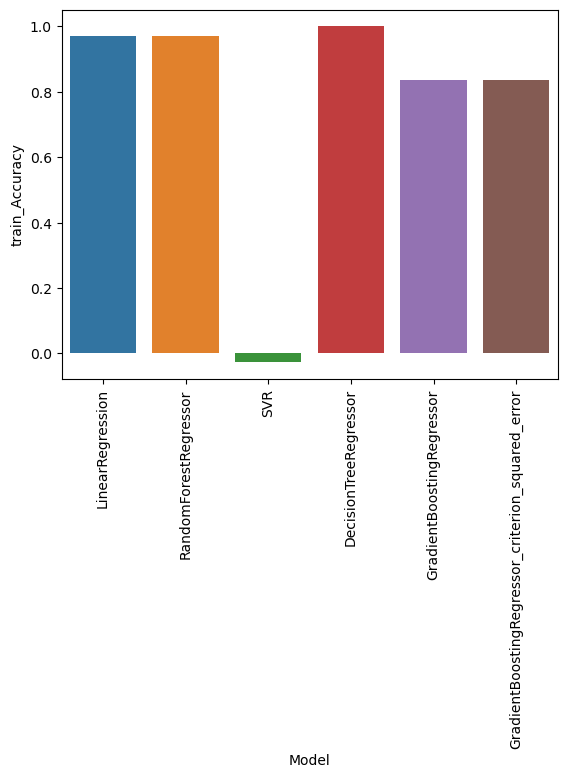

In [115]:
chart = sns.barplot(x= "Model" , y = "train_Accuracy" , data = accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'LinearRegression'),
 Text(1, 0, 'RandomForestRegressor'),
 Text(2, 0, 'SVR'),
 Text(3, 0, 'DecisionTreeRegressor'),
 Text(4, 0, 'GradientBoostingRegressor'),
 Text(5, 0, 'GradientBoostingRegressor_criterion_squared_error')]

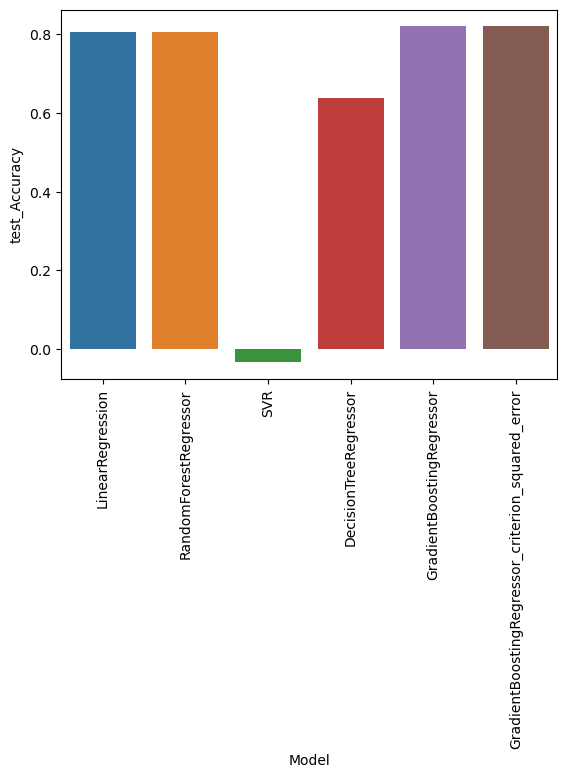

In [116]:
chart = sns.barplot(x= "Model" , y = "test_Accuracy" , data = accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

### GradientBoostingRegressor and GradientBoostingRegressor_criterion_squared_error are the Best Models 

# HyperParameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

para_grid = {
    
        "n_estimators":[100,150,200],
        "max_depth":[6,4,None],
        "criterion" :[None , "squared_error"], 
}




grid_search = GridSearchCV(
    estimator = GradientBoostingRegressor(),
    param_grid=para_grid,
    cv = 10
    
)



gd_search = grid_search.fit(x_train,x_test)



KeyboardInterrupt



In [ ]:
import pickle

with open("grid_searchcv.pickle" , "wb") as file:
    pickle.dump(gd_search , file)
    
    

In [ ]:
train = gd_search.predict(x_train)
test = gd_search.predict(y_train)

In [ ]:
r2_score(train,x_test) , r2_score(test , y_test)

In [ ]:
results_df = pd.DataFrame({
    'Parameters': gd_search.cv_results_['params'],
    'MeanTrainScore': gd_search.cv_results_['mean_train_score'],
    'MeanTestScore': gd_search.cv_results_['mean_test_score']})

In [ ]:
gd_search

In [ ]:
gd_search.cv_results_

In [235]:
results_df.to_csv('GridSearchPerformance.csv', index=None)